**INITIAL IMPORTS AND DATA**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(28)

In [37]:
data = pd.read_csv('Military Spending.csv')

Profiling

In [38]:
#Look at some basic information of the data. We can see that there 67 columns, with 63 of those being numeric
#There are 266 rows, we can see that many of these rows are missing entries for various columns 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            78 non-null     float64
 5   1961            89 non-null     float64
 6   1962            99 non-null     float64
 7   1963            104 non-null    float64
 8   1964            106 non-null    float64
 9   1965            107 non-null    float64
 10  1966            105 non-null    float64
 11  1967            110 non-null    float64
 12  1968            119 non-null    float64
 13  1969            118 non-null    float64
 14  1970            126 non-null    float64
 15  1971            127 non-null    float64
 16  1972            126 non-null    float64
 17  1973            135 non-null    flo

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,78.000000,89.000000,99.000000,104.000000,106.000000,107.000000,105.000000,110.000000,119.000000,118.000000,...,199.000000,200.000000,195.000000,197.000000,197.000000,199.000000,196.000000,196.000000,197.000000,194.000000
mean,3.478986,3.218632,3.349309,3.180219,3.246079,3.336451,3.409082,3.637793,3.591768,3.516320,...,1.930448,1.999643,1.956785,1.900178,1.852942,1.790842,1.818917,1.935736,1.852962,1.980269
std,2.861311,2.493265,2.650364,2.393290,2.225593,2.228118,2.676870,3.071507,3.238662,2.902567,...,1.450075,1.753501,1.640822,1.446379,1.335717,1.251401,1.214086,1.328016,1.236275,2.583611
min,0.673509,0.230825,0.113290,0.206490,0.000039,0.296956,0.000043,0.387944,0.000042,0.000042,...,0.034893,0.035933,0.052204,0.048225,0.049269,0.088094,0.082073,0.161615,0.110134,0.069184
25%,1.906422,1.702908,1.835543,1.724612,1.892964,1.731869,1.649485,1.625812,1.556057,1.564179,...,1.065918,1.040083,1.066976,1.068991,1.080842,1.066933,1.107781,1.118940,1.076190,1.051577
50%,2.616056,2.364066,2.567568,2.631477,2.883261,3.098346,2.988720,3.073525,3.030868,2.961591,...,1.575896,1.566864,1.535199,1.472531,1.536426,1.473991,1.569381,1.673384,1.543694,1.516930
75%,3.858485,3.765266,3.990597,3.888998,3.810301,3.974546,3.869120,4.333092,4.295005,4.123437,...,2.225570,2.241420,2.261590,2.224985,2.165815,2.140242,2.186053,2.344134,2.227770,2.274773
max,20.396745,16.507077,18.145500,17.118513,14.842176,13.409905,19.494261,23.492462,24.063819,19.089317,...,9.747273,15.479576,13.325672,10.563126,10.223848,9.137180,8.133567,9.178471,7.581469,33.546573


In [39]:
#Look at a sample of the data to see what it looks like 
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,1.537008,2.091894,1.882361,2.456137,2.486424,...,1.729627,1.759087,1.535199,1.274576,1.272376,1.118761,1.073977,1.102762,1.005835,1.000080
2,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.076950,1.298013,0.994576,0.956772,0.945227,1.006746,1.170968,1.358857,1.827934,NaN
3,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.315351,1.314010,1.442316,1.468636,...,0.767652,0.731363,0.677259,0.826473,0.822144,0.847022,0.801030,0.949690,1.164951,0.973350
4,Angola,AGO,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.455239,4.698455,3.105426,2.733335,2.507983,1.955787,1.739070,1.700178,1.289923,1.328722


**PROFILING**

In [40]:
#It appears that two of columns, Indicator Name and Indicator Code, are the same for every entry: let's check
codes = data['Indicator Code'].nunique()
names = data['Indicator Name'].nunique()
print(f'There are {codes} Indicator Codes and {names} Indicator Names.')

There are 1 Indicator Codes and 1 Indicator Names.


In [41]:
#Because there is only one value for both of these columns, we should remove them from the data
data = data.drop(columns=['Indicator Name', 'Indicator Code'])
print(data.shape)

(266, 65)


In [42]:
#Additionally, Country Code does not hold any predictive meaning, 
#so we will drop that too
data = data.drop(columns='Country Code')

In [43]:
data.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,1.537008,2.091894,1.882361,2.456137,2.486424,2.507120,2.359467,2.354975,...,1.729627,1.759087,1.535199,1.274576,1.272376,1.118761,1.073977,1.102762,1.005835,1.000080
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.076950,1.298013,0.994576,0.956772,0.945227,1.006746,1.170968,1.358857,1.827934,NaN
3,Africa Western and Central,NaN,NaN,1.315351,1.314010,1.442316,1.468636,1.367613,NaN,5.396751,...,0.767652,0.731363,0.677259,0.826473,0.822144,0.847022,0.801030,0.949690,1.164951,0.973350
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.455239,4.698455,3.105426,2.733335,2.507983,1.955787,1.739070,1.700178,1.289923,1.328722


In [44]:
#Next, we need to preprocess the data further to fit our current problem.
#I changed the problem from the proposal after some further analysis: the goal
#is now to conduct Time Series Forecasting using a RNN, LSTM, or some other similar
#model. Thus, we must switch rows and columns.
data = data.set_index('Country Name').T

In [45]:
data.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,...,NaN,NaN,NaN,6.172034,NaN,NaN,NaN,0.950977,NaN,NaN
1961,NaN,1.537008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.14,...,NaN,NaN,NaN,6.102438,NaN,NaN,NaN,1.467849,NaN,NaN
1962,NaN,2.091894,NaN,1.315351,NaN,NaN,NaN,NaN,NaN,2.66,...,NaN,NaN,NaN,6.267471,NaN,NaN,NaN,2.254837,NaN,NaN
1963,NaN,1.882361,NaN,1.314010,NaN,NaN,NaN,3.878100,NaN,1.68,...,NaN,NaN,NaN,5.982015,NaN,NaN,NaN,2.064608,NaN,NaN
1964,NaN,2.456137,NaN,1.442316,NaN,NaN,NaN,4.474398,NaN,1.15,...,NaN,NaN,NaN,5.509652,NaN,NaN,NaN,2.695609,NaN,NaN


In [46]:
#We noticed before that some of the countries were missing a lot of data.
#So we will drop the countries that are missing >50% of the years 
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data>31]
missing_data_labels = list(missing_data.index)
print(missing_data)
# missing_data = missing_data.sort_values(ascending=True) 
# plot = plt.bar(x=missing_data_labels,height=missing_data,align='edge',width=0.5)
# plt.xticks(rotation=90,fontsize=4)  
# plt.show()

Country Name
Aruba                   63
Afghanistan             39
Andorra                 63
United Arab Emirates    45
Armenia                 33
                        ..
Viet Nam                39
Vanuatu                 63
Samoa                   63
Kosovo                  48
Yemen, Rep.             38
Length: 100, dtype: int64


In [47]:
#We see that 100 columns were dropped
data = data.dropna(thresh=31, axis=1)
data

Country Name,Africa Eastern and Southern,Africa Western and Central,Angola,Albania,Arab World,Argentina,Australia,Austria,Azerbaijan,Burundi,...,Uganda,Ukraine,Upper middle income,Uruguay,United States,"Venezuela, RB",World,South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,1.550000,2.369545,1.458186,NaN,NaN,...,NaN,NaN,NaN,NaN,8.993125,3.058044,6.172034,0.950977,NaN,NaN
1961,1.537008,NaN,NaN,NaN,NaN,2.140000,2.415140,1.309338,NaN,NaN,...,NaN,NaN,NaN,NaN,9.156032,1.422222,6.102438,1.467849,NaN,NaN
1962,2.091894,1.315351,NaN,NaN,NaN,2.660000,2.363695,1.352072,NaN,3.943794,...,0.113290,NaN,NaN,NaN,9.331673,2.312902,6.267471,2.254837,NaN,NaN
1963,1.882361,1.314010,NaN,NaN,3.878100,1.680000,2.446635,1.579668,NaN,0.434783,...,0.369318,NaN,NaN,NaN,8.831891,2.553588,5.982015,2.064608,NaN,NaN
1964,2.456137,1.442316,NaN,NaN,4.474398,1.150000,2.648243,1.887300,NaN,0.445620,...,0.651163,NaN,NaN,NaN,8.051281,2.446689,5.509652,2.695609,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1.118761,0.847022,1.955787,1.160545,5.896441,0.732300,1.895670,0.745028,3.562401,2.149420,...,1.232713,3.192353,1.592819,1.971272,3.323866,0.150854,2.137095,0.897196,1.437499,1.137810
2019,1.073977,0.801030,1.739070,1.280806,5.412459,0.699696,1.881043,0.750360,3.873412,2.807817,...,1.747573,3.520152,1.603842,1.885387,3.434568,1.792304,2.184468,0.884245,1.255655,0.729567
2020,1.102762,0.949690,1.700178,1.298479,5.780886,0.734493,2.010640,0.884127,5.390495,2.185913,...,2.680234,3.811849,1.686721,2.035838,3.696010,1.575523,2.343197,0.957517,1.167468,0.261761
2021,1.005835,1.164951,1.289923,1.220845,5.101784,0.630929,1.989123,0.873695,5.270059,2.043010,...,2.577855,3.228347,1.528953,2.101309,3.457977,0.313631,2.198728,0.809813,0.979966,0.815977


In [48]:
#One technique I researched to deal with the remaining missing data is forward filling
#and backfilling. These techniques make assumptions that get rid of any gaps in the time series
#data and can help feed the data to a model without risk of errors.
data = data.ffill().bfill()
print(f'There are now {data.isnull().sum().sum()} NaN values.')
data

There are now 0 NaN values.


Country Name,Africa Eastern and Southern,Africa Western and Central,Angola,Albania,Arab World,Argentina,Australia,Austria,Azerbaijan,Burundi,...,Uganda,Ukraine,Upper middle income,Uruguay,United States,"Venezuela, RB",World,South Africa,Zambia,Zimbabwe
1960,1.537008,1.315351,0.000017,6.052022,3.878100,1.550000,2.369545,1.458186,2.400226,3.943794,...,0.113290,0.318087,4.459399,2.198068,8.993125,3.058044,6.172034,0.950977,3.001420,1.189568
1961,1.537008,1.315351,0.000017,6.052022,3.878100,2.140000,2.415140,1.309338,2.400226,3.943794,...,0.113290,0.318087,4.459399,2.198068,9.156032,1.422222,6.102438,1.467849,3.001420,1.189568
1962,2.091894,1.315351,0.000017,6.052022,3.878100,2.660000,2.363695,1.352072,2.400226,3.943794,...,0.113290,0.318087,4.459399,2.198068,9.331673,2.312902,6.267471,2.254837,3.001420,1.189568
1963,1.882361,1.314010,0.000017,6.052022,3.878100,1.680000,2.446635,1.579668,2.400226,0.434783,...,0.369318,0.318087,4.459399,2.198068,8.831891,2.553588,5.982015,2.064608,3.001420,1.189568
1964,2.456137,1.442316,0.000017,6.052022,4.474398,1.150000,2.648243,1.887300,2.400226,0.445620,...,0.651163,0.318087,4.459399,2.198068,8.051281,2.446689,5.509652,2.695609,3.001420,1.189568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,1.118761,0.847022,1.955787,1.160545,5.896441,0.732300,1.895670,0.745028,3.562401,2.149420,...,1.232713,3.192353,1.592819,1.971272,3.323866,0.150854,2.137095,0.897196,1.437499,1.137810
2019,1.073977,0.801030,1.739070,1.280806,5.412459,0.699696,1.881043,0.750360,3.873412,2.807817,...,1.747573,3.520152,1.603842,1.885387,3.434568,1.792304,2.184468,0.884245,1.255655,0.729567
2020,1.102762,0.949690,1.700178,1.298479,5.780886,0.734493,2.010640,0.884127,5.390495,2.185913,...,2.680234,3.811849,1.686721,2.035838,3.696010,1.575523,2.343197,0.957517,1.167468,0.261761
2021,1.005835,1.164951,1.289923,1.220845,5.101784,0.630929,1.989123,0.873695,5.270059,2.043010,...,2.577855,3.228347,1.528953,2.101309,3.457977,0.313631,2.198728,0.809813,0.979966,0.815977


In [67]:
data['United States'].max

<bound method Series.max of 1960    8.993125
1961    9.156032
1962    9.331673
1963    8.831891
1964    8.051281
          ...   
2018    3.323866
2019    3.434568
2020    3.696010
2021    3.457977
2022    3.454920
Name: United States, Length: 63, dtype: float64>

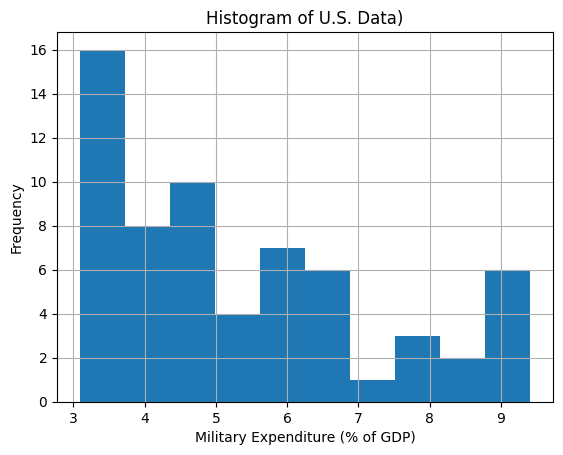

In [69]:
#Lets visualize some of the countries:
#We know the US had no missing values
hist = data['United States'].hist()
plt.xlabel('Military Expenditure (% of GDP)')
plt.ylabel('Frequency')
plt.title('Histogram of U.S. Data)')
plt.show()

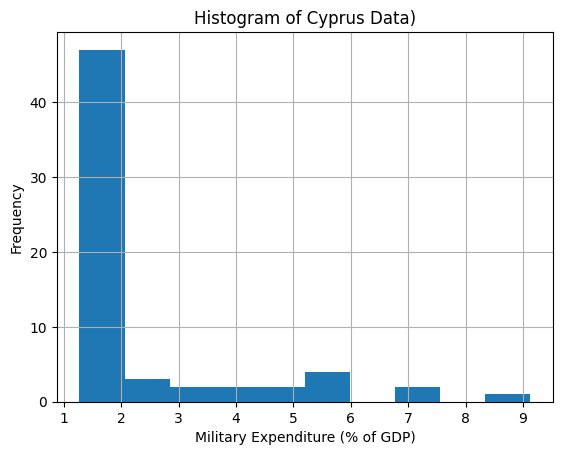

In [68]:
#Lets check for a country that had many missing values (24)
#As expected we see a high density around one value due to the backfill
hist = data['Cyprus'].hist()
plt.xlabel('Military Expenditure (% of GDP)')
plt.ylabel('Frequency')
plt.title('Histogram of Cyprus Data)')
plt.show()

**MODELS**

In [51]:
#Due to the vast number of columns, we can try to predict multiple outcomes.
#The first outcome we will try to predict is the "World" column. We want to predict
#potential values in future years based off of the previous data. I mentioned that I 
#will test RNNs and LSTMs above, but we can first start off with simple regressors as
#our outcome is numeric.

X_train, X_test, y_train, y_test = train_test_split( data, data.World, test_size=0.1 )
listNum = [col for col in data.columns if col != 'World']

#The first model will be a Support Vector Machine (Regression) (Default params)
from sklearn.svm import SVR
SVM_pipe = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] )),
    ('scaler',   StandardScaler() ),
    ('model', SVR())
])

SVM_pipe.fit(X_train, y_train)
SVM_train_Preds = SVM_pipe.predict(X_train)
SVM_test_Preds = SVM_pipe.predict(X_test)

In [52]:
#Lets check some metrics

#Mean Absolute Error: Measures avg magnitude of errors between the truth and pred.
#I got 0.08 for train and 0.09 for test. Not bad.

from sklearn.metrics import mean_absolute_error
mae_Train = mean_absolute_error(y_train, SVM_train_Preds)
mae_Test = mean_absolute_error(y_test, SVM_test_Preds)
print(f' MAE for Train: {mae_Train}\n MAE for Test: {mae_Test}')

 MAE for Train: 0.0804887009440437
 MAE for Test: 0.1552518530185603


In [53]:
#Root Mean Squared Error: Similar to MAE but it punishes larger errors more heavily.
#I got 0.09 for train and 0.14 for test.

from sklearn.metrics import root_mean_squared_error
rmse_Train = root_mean_squared_error(y_train, SVM_train_Preds)
rmse_Test = root_mean_squared_error(y_test, SVM_test_Preds)
print(f' RMSE for Train: {rmse_Train}\n RMSE for Test: {rmse_Test}')

 RMSE for Train: 0.08986679421215275
 RMSE for Test: 0.18452892068295512


In [54]:
#R^2: Indicates the proportion of variance explained by the model. The goal is 1 = perfect.
#I got 99% for train and 96% for test! 
from sklearn.metrics import r2_score
print( f"Train r2: {r2_score( y_train, SVM_train_Preds)}" )
print( f"Test r2:  {r2_score( y_test,  SVM_test_Preds)}" )

Train r2: 0.9953714181896358
Test r2:  0.9579777110122097


In [55]:
#Now I will predict the value for 2023. The group (SIPRI) that created the dataset updated their dataset for 2023
#but they used numerous different country names (some new countries, some countries from old data missing,
# others with different names), so I could not use this data to predict. So I used forward filling from 2022 
# for the missing values. I also included any data for countries that were in the new 2023 SIPRI data that were 
# also in the old dataset. Some notable values for 2023 include ~37 for Ukraine and ~5.9 for Russia. 
  
# Integrate the provided 2023 values with inferred values for remaining countries
# Use existing provided data if available; otherwise, use 2022 data for 2023
data_2022 = data.loc['2022']
data_2023 = data_2022.copy()
# data_2023 = data_2023.drop(columns='World')

# Convert this inferred 2023 data to a DataFrame 
data_2023_df = pd.DataFrame(data_2023).T
data_2023_df.index = ['2023']

#This file required preprocessing outside of the code to get it into a readable format that works with the model
sipri_data = pd.read_excel('SIPRI-Milex-data-2023-2023.xlsx')
sipri_data = sipri_data.drop(columns= ['Unnamed: 1', 'Unnamed: 3'])
sipri_data = sipri_data.set_index('Country').T
sipri_data = sipri_data.apply(pd.to_numeric, errors='coerce')

for country, values in sipri_data.items():
    for year, spending in values.items():
        if pd.notna(spending) and country in data_2023_df.columns:
            # print(country)
            # print(data_2023_df.at["2023", country]-spending)  #debugging statements 
            data_2023_df.at['2023', country] = spending
            # print(data_2023_df.at["2023", country]-spending)
            
data_2023_df_1 = data_2023_df.drop(columns='World')
data_2023_df_1

Country Name,Africa Eastern and Southern,Africa Western and Central,Angola,Albania,Arab World,Argentina,Australia,Austria,Azerbaijan,Burundi,...,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,"Venezuela, RB",South Africa,Zambia,Zimbabwe
2023,1.00008,0.97335,1.332529,1.743992,4.940873,0.472747,1.922199,0.844275,4.602103,3.658928,...,1.151694,1.982056,36.65311,1.629245,2.000122,3.45492,0.649887,0.733137,1.303002,0.248808


In [56]:
#The prediction is 3.06, despite the actual value for 2023 being 2.3 from SIPRI (the exact value is 2.44 trillion/105,435.04 billion
# = 0.023142211545611403 = 2.3142%). This is not very good, so we will try a more advanced model.
SVM_pipe.predict(data_2023_df_1)

array([3.05650642])

In [57]:
#The second model will be a Gradient Boosting Regressor (Default params)
from sklearn.ensemble import GradientBoostingRegressor
GBR_pipe = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] )),
    ('scaler',   StandardScaler() ),
    ('model', GradientBoostingRegressor())
])

GBR_pipe.fit(X_train, y_train)
GBR_train_Preds = GBR_pipe.predict(X_train)
GBR_test_Preds = GBR_pipe.predict(X_test)

In [58]:
mae_Train = mean_absolute_error(y_train, GBR_train_Preds)
mae_Test = mean_absolute_error(y_test, GBR_test_Preds)
print(f' MAE for Train: {mae_Train}\n MAE for Test: {mae_Test}')

 MAE for Train: 0.00020409214051466832
 MAE for Test: 0.04167541205506912


In [59]:
rmse_Train = root_mean_squared_error(y_train, GBR_train_Preds)
rmse_Test = root_mean_squared_error(y_test, GBR_test_Preds)
print(f' RMSE for Train: {rmse_Train}\n RMSE for Test: {rmse_Test}')

 RMSE for Train: 0.0002465184446094921
 RMSE for Test: 0.047965063616466505


In [60]:
print( f"Train r2: {r2_score( y_train, GBR_train_Preds)}" )
print( f"Test r2:  {r2_score( y_test,  GBR_test_Preds)}" )

Train r2: 0.9999999651704163
Test r2:  0.9971607680622844


In [61]:
#Predicted 2.3291! Nice!
GBR_pipe.predict(data_2023_df_1)

array([2.32910503])

In [138]:
#Try iterative imputer on the original data instead of dropping and filling
data2 = pd.read_csv('Military Spending.csv')
data2 = data2.drop(columns=['Indicator Name', 'Indicator Code'])
data2 = data2.drop(columns='Country Code')
data2 = data2.set_index('Country Name').T
X_train, X_test, y_train, y_test = train_test_split( data2, data2.World, test_size=0.1 )
listNum2 = [col for col in data.columns if col != 'World']

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor



SVM_pipe2 = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum2) ] )),
    ('scaler',   StandardScaler() ),
    ('imputer', IterativeImputer(n_nearest_features=25, max_iter=250, estimator=KNeighborsRegressor(), tol=5)),
    ('model', SVR())
])

SVM_pipe2.fit(X_train, y_train)
SVM_train_Preds2 = SVM_pipe2.predict(X_train)
SVM_test_Preds2 = SVM_pipe2.predict(X_test)
#Predicted 3.3353 with the SVM and imputed data, which is the furhtest value from the truth so far
SVM_pipe2.predict(data_2023_df_1)

array([3.21596096])

In [140]:
mae_Train = mean_absolute_error(y_train, SVM_train_Preds2)
mae_Test = mean_absolute_error(y_test, SVM_test_Preds2)
print(f' MAE for Train: {mae_Train}\n MAE for Test: {mae_Test}')
rmse_Train = root_mean_squared_error(y_train, SVM_train_Preds2)
rmse_Test = root_mean_squared_error(y_test, SVM_test_Preds2)
print(f' RMSE for Train: {rmse_Train}\n RMSE for Test: {rmse_Test}')
print( f"Train r2: {r2_score( y_train, SVM_train_Preds2)}" )
print( f"Test r2:  {r2_score( y_test,  SVM_test_Preds2)}" )

 MAE for Train: 0.08337381697035126
 MAE for Test: 0.28015959433008775
 RMSE for Train: 0.09974418255769033
 RMSE for Test: 0.38181008418104057
Train r2: 0.9934786114939269
Test r2:  0.947856364967442


In [139]:
GBR_pipe2 = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] )),
    ('scaler',   StandardScaler() ),
    ('imputer', IterativeImputer(n_nearest_features=25, max_iter=250, estimator=KNeighborsRegressor(), tol=5)),
    ('model', GradientBoostingRegressor())
])

GBR_pipe2.fit(X_train, y_train)
GBR_train_Preds2 = GBR_pipe2.predict(X_train)
GBR_test_Preds2 = GBR_pipe2.predict(X_test)
#Predicted 2.2539 with the GBR and imputed data, this is the second best value so far. The GBR with filled data was better
GBR_pipe2.predict(data_2023_df_1)

array([2.35982075])

In [141]:
mae_Train = mean_absolute_error(y_train, GBR_train_Preds2)
mae_Test = mean_absolute_error(y_test, GBR_test_Preds2)
print(f' MAE for Train: {mae_Train}\n MAE for Test: {mae_Test}')
rmse_Train = root_mean_squared_error(y_train, GBR_train_Preds2)
rmse_Test = root_mean_squared_error(y_test, GBR_test_Preds2)
print(f' RMSE for Train: {rmse_Train}\n RMSE for Test: {rmse_Test}')
print( f"Train r2: {r2_score( y_train, GBR_train_Preds2)}" )
print( f"Test r2:  {r2_score( y_test,  GBR_test_Preds2)}" )

 MAE for Train: 0.00013908664325761638
 MAE for Test: 0.08669880299616592
 RMSE for Train: 0.0001649019766788104
 RMSE for Test: 0.1424604747562185
Train r2: 0.9999999821755291
Test r2:  0.9927406909019373


In [64]:
#Now I will try implementing a RNN. This model works for time series data through the following steps. The first input value (x_0) is passed into
#hidden state 0, which multiplies the input vector by a weight matrix specfic to state 0, giving us a new matrix, a_0. From there, another martrix 
#multiplication is computed to attain y_0, the output vector. a_0 is then used as the weight matrix for hidden state 1, which also takes in x_1 as 
#its input. The process then repeats until y_n is obtained. The easiest way to implement a RNN is through pytorch, a machine learning library.

import torch
from torch import nn

torch.manual_seed(28)

#Below is a check to see if mps is faster than cpu because I don't have access to NVIDIA GPU and CUDA. From past experience, mps seems to be
#kind of pointless in its current state and is often outperformed by CPU. 
from time import perf_counter as pc

#see how long it takes to run a RNN on mps
start = pc()
rnn = nn.RNN(200, 50, 5).to(device='mps')
input = torch.randn(5, 1, 200).to(device='mps')
h0 = torch.randn(5, 1, 50).to(device='mps')
output, hn = rnn(input, h0)
end = pc()
mps = end-start

#see how long it takes to run a RNN on cpu
start2 = pc()
rnn = nn.RNN(200, 50, 5)
input = torch.randn(5, 1, 200)
h0 = torch.randn(5, 1, 50)
output, hn = rnn(input, h0)
end2 = pc()
cpu = end2-start2

if mps < cpu:
    print(f'mps was faster than CPU. Difference of {cpu-mps}')
    device = 'cuda' if torch.cuda.is_available() else 'mps'
else:
    print(f'CPU was faster than mps. Difference of {mps-cpu}')
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device is {device}')

CPU was faster than mps. Difference of 0.1441863759973785
device is cpu


In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_torch = scaler.fit_transform(data.copy())

#Convert the data to a tensor, the main object used by pytorch, akin to numpy array for numpy or dataframe for pandas
input = torch.tensor(data_torch, dtype=torch.float32,device=device)
print(f'Tensor Size: {input.size()}')
#Unsqueeze because the RNN function expects a tensor of size (seq_len, batch_size, input_size)
input = input.unsqueeze(1)
print(f'Tensor Size: {input.size()}')

#Create the RNN class for training. We must define all of our layers in the init function. Pytorch has a built in rnn layer.
class RNN(nn.Module):
    def __init__(self, input, hidden_size, num_layers, device, dropout=0.2):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input.size()[2], hidden_size, num_layers, nonlinearity='tanh', dropout=dropout).to(device=device)
        self.fc = nn.Linear(hidden_size, input.size()[2]).to(device=device)
    
    def forward(self, input, hidden):
        output, h_n = self.rnn(input, hidden)
        #to get the prediction from rnn in pytorch we have to apply the output function manually
        #So, in this case we just care about the prediction for 2023, thus apply a linear transform to the final hidden state matrix
        pred = self.fc(h_n[-1])
        return pred

Tensor Size: torch.Size([63, 176])
Tensor Size: torch.Size([63, 1, 176])


In [144]:
import copy

#Hyperparameters for the model
hidden_size = 50 #size of hidden state weight matrices
num_layers = 3 #number of RNNs in the total pipeline
learning_rate = 0.001
num_epochs = 100 #number of iterations to train over
num_models = 15 #how many models I will test
loss_fn = nn.MSELoss()

#target tensor - 2023, and initial hidden weight matrix
target = torch.tensor(data_2023_df.values, dtype=torch.float32,device=device)
hidden_0 = torch.randn(num_layers, input.size()[1], hidden_size).to(device=device) #(layer RNN, batch size, hidden layer size)

#create variables and function to find the best model. The models differ due to randomness, so we should train a number of them.
best_losses = [float('inf')] * num_epochs
best_model = None
best_pred = None

def best_model_tracker(curr_losses, curr_model, curr_pred):
    global best_losses, best_model, best_pred
    if np.mean(curr_losses[-10:]) < np.mean(best_losses[-10:]) and curr_pred[0][172] != 0:
        best_losses = copy.copy(curr_losses)
        best_model = copy.deepcopy(curr_model) #use deep copy bc copying an object of other objects
        best_pred = curr_pred.clone()

#loop for creating a new model
for model in range(num_models):
    losses = []
    curr_model = RNN(input, hidden_size, num_layers, device)
    optimizer = torch.optim.Adam(curr_model.parameters(), lr=learning_rate)

    #iteration loop for training
    for epoch in range(num_epochs):
        curr_model.train()
        optimizer.zero_grad()
        
        pred = curr_model(input, hidden_0)
        pred = torch.nn.functional.relu(pred) #remove negative predictions bc negative expenditure doesn't make sense
        
        loss = loss_fn(pred, target)  
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())

        if(epoch == num_epochs-1):
            #print(f'Overall Prediction Vector: {pred}')
            print(f'World Military Expenditure Prediction: {pred[0][172]:.4f}') #pred[0][172] represents the World column

        best_model_tracker(losses, curr_model, pred)

print(f'The best model predicted World Miltary Expenditure as: {best_pred[0][172]:.4f}')

#Save the best model's weights so we can use it in the future if needed
torch.save(best_model.state_dict(), '/Users/razorsharpe9/Desktop/Machine Learning/ML and AI/MLAI_RNN_state.pth')

###I plan on doing more hyperparam tuning of the RNN for my final submission because I believe that it can be the most accurate, and potentially 
#most useful model. I also need to think more about how I am actually choosing and evaluating the best model because what I am doing
#now is definitely not the most effective and sensible method.

World Military Expenditure Prediction: 2.3216
World Military Expenditure Prediction: 2.3134
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 2.2698
World Military Expenditure Prediction: 2.3179
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 2.3453
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 0.0000
World Military Expenditure Prediction: 2.2653
World Military Expenditure Prediction: 2.2792
World Military Expenditure Prediction: 0.0000
The best model predicted World Miltary Expenditure as: 2.3179


In [145]:
mean_absolute_error(target.detach(), best_pred.detach())

np.float32(0.6866571)

In [146]:
root_mean_squared_error(target.detach(), best_pred.detach())

np.float32(0.6866571)

In [150]:
3.2160-2.3142

0.9018000000000002